# Phase 4 Code Challenge
This code challenge is designed to test your understanding of the Phase 1 material. It covers:

- KNN & Pipelines
- Ensemble & Boosting
- Natural Langauge Processing
- Clustering

*Read the instructions carefully.* Your code will need to meet detailed specifications to pass automated tests.

## Short Answer Questions 

For the short answer questions...

* _Use your own words_. It is OK to refer to outside resources when crafting your response, but _do not copy text from another source_.

* _Communicate clearly_. We are not grading your writing skills, but you can only receive full credit if your teacher is able to fully understand your response. 

* _Be concise_. You should be able to answer most short answer questions in a sentence or two. Writing unnecessarily long answers increases the risk of you being unclear or saying something incorrect.

In [36]:
# Run this cell without changes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score

import nltk
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import KMeans

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


---
## Part 1: KNN + Pipelines [Suggested time: 20 minutes]
---

You are given a dataset containing various physical characteristics of the seeds of three distinct species of wheat. Your job will be to tune/train a KNN classifier that can predict the species based on the provided features.

Load in the data:

In [37]:
# Run this cell without changes to load in data
wheat_df = pd.read_csv('wheat_seeds.csv')
wheat_df.head()

# wheat_df.columns

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Inspect this dataframe and its statistics:

In [38]:
# Run this cell without changing
wheat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      174 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [39]:
# Run this cell without changing
wheat_df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,174.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.869909,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023447,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.856675,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.872300,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.885625,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


There are a few NaNs in the `compactness` column and a quick look at the summary statistics reveal that the mean and variance for some of the features are significantly different. We are going to simple `impute` the `NaN` with the mean and standard scale the features.

### 1.1) Short Answer: What fact about the KNN algorithm makes it necessary to standard scale the features? Explain.

# Your answer here # brian-answer
knn algorithm depends on measuring distances like Euclidean distance. Some results might be skewed if some data has long distances thus standard scaling helps make data to have close-like distance-relationship.

### 1.2) Short Answer: We'll be setting up a Pipeline to do the imputation, scaling, and then passing the data on to the KNN model. What problem can pipelines help avoid during cross-validation?

# Your answer here # brian-answer
pipelines help prevent data leakage while doing cross validation, particularly helping us avoid imputing the entire dataset before splitting the test and training data in the course of preprocessing. 


Now we'll create a pipeline that performs a couple transformations before passing the data to a KNN estimator.

In [40]:
# Run this cell without changes
steps = [('imp', SimpleImputer(strategy='mean')),
         ('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors=30))]
         
pipe = Pipeline(steps) 

### 1.3) Conduct a 70-30 train-test split. Use a `random_state` of 42 for the train_test_split. Save the train and test set features to X_train, X_test respectively. Save the train and test set labels to y_train, y_test respectively.

In [41]:
# CodeGrade step1.1
# Replace None with appropriate code
# do the required data splitting here

# Assign X and y, use all columns but y for X
X = wheat_df.drop(columns='Type')
y = wheat_df['Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 42)

A quick perusal shows that the train set is fairly balanced. We'll thus use classification accuracy as our metric for evaluating our train/test sets.

In [42]:
# Run this cell without changes
y.value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

### 1.4) Train/fit the pipeline and evaluate accuracy on the test set. Save your predicted values on the test set to `y_pred`. Save your computed test accuracy score to the variable `test_acc`.

In [43]:
# CodeGrade step1.2
# Replace None with appropriate code

# Fit pipeline
pipe.fit(X_train, y_train)

# Test set predictions and accuracy score
y_pred = pipe.predict(X_test)
test_acc = accuracy_score(y_test, y_pred) 
test_acc

0.8833333333333333

Tuning the hyperparameters of the transformers and estimators in our pipeline can be accomplished using a grid search cross validation or a randomized search cross validation.

### 1.5) Create a GridSearchCV on the pipeline and save it to an object called `grid_knn`:
- create a parameter grid that allows the search to tune the following:
    - n = 1, 5, 10, 20, 30 nearest neighbors for KNN
    - mean and mode strategies for imputation
- perform a $k=5$ cross validation on our pipeline estimator.
- gridsearch the pipeline using a scoring metric of accuracy
- Extract the best model from the gridsearch and save it to a variable *best_pipe*

In [44]:
# CodeGrade step1.3

# Setup grid for search
params = {
    'imp__strategy': ['mean', 'most_frequent'],
    'knn__n_neighbors': [1, 5, 10, 20, 30]
}

# Instanstiate grid search object
grid_knn = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    cv=5,
    scoring='accuracy'
)

# Fit and get best model
grid_knn.fit(X_train, y_train)
best_pipe = grid_knn.best_estimator_

The best parameters are:

In [45]:
# Run this cell without changes
print(grid_knn.best_params_)

{'imp__strategy': 'mean', 'knn__n_neighbors': 5}


### 1.6) Retrain `best_pipe` (your best model from cross validation) on your entire train set and predict on the true hold-out test set. 
- Save model test predictions to a variable `y_best_pred`
- Evaluate the model accuracy on the test set and save it to a variable `tuned_test_acc`

In [46]:
# CodeGrade step1.4
# Replace None with appropriate code

# Refit to train
best_pipe.fit(X_train, y_train)

# Test set predictions and scores
y_best_pred = best_pipe.predict(X_test)
tuned_test_acc = accuracy_score(y_test, y_best_pred)
tuned_test_acc

0.9166666666666666

## Part 2: Ensembles & Boosting [Suggested time: 5 minutes]

Random forests are an `ensemble tree method` that aggregates the results of many randomized decision trees in order to construct a classifier/regressor that often performs better than a single decision tree. 

### 2.1) Short Answer: Identify the two main methods of randomization used in random forests. How are these methods employed in the random forest algorithm, and how do they help to combat the high variance that tends to characterize decision-tree models?

# Your  answer here # brian-answer

The main two methods are bootstrap sampling (aka bagging) and random-feature-selection. Bagging introduces variation by training each tree on a random sample of the original data, selected with replacement. In random feature selection, only a random subset of features is considered at each split. These methods reduce model variance and improve performance compared to a single decision tree.


### 2.2) Short Answer: In order to get a random forest that generalizes well, it's typically necessary to tune some hyperparameters. In the language of Sklearn's implementation, one of the most relevant hyperparameters is `max_depth`. Describe this hyperparameter and how it can factor into model performance.

# Your answer here # brian-answer

The max_depth parameter helps control the number of splits a tree can have from the root to the leaf. A large depth can capture more depth patterns but that would lead to overfitting while a small depth helps improve generalization but may lead to underfitting. This all basically helps us to balance between bias and variance in the model. 

## Part 3: Natural Language Processing [Suggested time: 20 minutes]

You have recieved a collection of Amazon Kindle book reviews. The text has been labeled with a positive (1) or negative (0) sentiment. You are tasked with training a Sentiment Analyzer off of this free text data. First, let's load in the data.

In [47]:
# Run this cell without changes to load in data
sentiment_data = pd.read_csv('sentiment_analysis.csv')
sentiment_data.head()

,reviewText,target
0,This book was the very first bookmobile book I...,1.0
1,"When I read the description for this book, I c...",0.0
2,I just had to edit this review. This book is a...,1.0
3,I don't normally buy 'mystery' novels because ...,1.0
4,"This isn't the kind of book I normally read, a...",1.0


One of the most important tasks before attempting to construct feature vectors and modeling is to tokenize and then normalize/preprocess the text. This can include:
- lower casing
- removing numerics 
- removing stopwords
- stemming/lemmatization

### 3.1) Short Answer: Explain why stop word removal might be a useful preprocessing step prior to any given predictive task.

# Your answer here # brian-answer

This stop-word removal is crucial because "stop-words" such as 'the', 'is', 'of', 'and', etc are very common words which would serve very little meaning in prediction. Hence, removing them reduces noises and lowers dimensionality allowing the model to focus on more distinctive words that would inform sentiments and content. 

The following function takes in the reviewText column in our sentiment_data dataframe and preprocesses the documents. Run the following cell. This may take a minute. The preprocessed text will be saved to a new column in our sentiment_data dataframe.

In [48]:
# Run this cell without changes to preprocess the text

def tokenize_and_preprocess(reviews):
    
    stop_words = stopwords.words('english')
    patt = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b\s+') 

    preproc_step1 = sentiment_data.reviewText.str.lower().str.replace(
        r'[0-9]+', '',regex = True).str.replace(patt, '', regex = True)
    
    # tokeniz. result is a Pandas series of document represented as lists of tokens
    preproc1_tokenized = preproc_step1.apply(word_tokenize)
    
    # inner function. takes in single document as token list.
    # processes further by stemming and removing non-alphabetic characters
    
    def remove_punct_and_stem(doc_tokenized):
        
        stemmer = SnowballStemmer('english')
        
        filtered_stemmed_tok = [stemmer.stem(tok) for tok in doc_tokenized if tok.isalpha() ]
        
        return " ".join(filtered_stemmed_tok)
        
    preprocessed = preproc1_tokenized.apply(remove_punct_and_stem)
        
    return preprocessed

sentiment_data['preprocessed_text'] = tokenize_and_preprocess(sentiment_data.reviewText)

Our text has been preprocessed and we can create a BoW matrix. You will use a TF-IDF vectorizer for this task. But before doing that:

### 3.2) Short Answer: Explain, in your own words, how the TF-IDF vectorizer assigns weights to features (tokens) in a given document. What would a high score mean for a particular word & document pair.

# Your answer here # brian-answer

The TF-IDF vectorizer gives weights based on two terms frequency (TF), which determines how often a word appears in a document and the Inverse Document Frequency (IDF), which determines how rare that word is across all entire series of documents. A word gets a high score when it appears frequently in one document but is rare across the entire corpus meaning the word is important in the specific document proving helpful to the model to differentiate it from other words.

### 3.3) Save the relevant text and target to X_sent, y_sent. Use the `preprocessed_test` column created above. Train/test split with a random_state = 42. Use a 70-30 train-test split and save to the relevant variables below.

In [49]:
# CodeGrade step3.1
# Replace None with appropriate code

X_sent = sentiment_data['preprocessed_text']
y_sent = sentiment_data['target']

X_sent_train, X_sent_test, y_sent_train, y_sent_test = train_test_split(
    X_sent, y_sent, test_size=0.3, random_state = 42
)

### 3.4) Create a pipeline that TF-IDF vectorizes text input and then feeds it into a Multinomial Naive Bayes classifier. Ensure that tokens that are in less than 1% of the documents and in more than 90% of the documents are filtered out by our pipeline. Save the pipeline as a variable **nlp_pipe**.

In [50]:
# CodeGrade step3.2
# Replace None with appropriate code

nlp_pipe = Pipeline([
    ('tfidf', 
        TfidfVectorizer(
            min_df = 0.01, 
            max_df=0.9)
        ),
    ('nb', 
        MultinomialNB()
    )
])

### 3.5) Train the pipeline and then predict on the test set. Save predicted test values as y_sent_pred and then evaluate the test accuracy score.

In [51]:
# CodeGrade step3.3
# Replace None with appropriate code

nlp_pipe.fit(X_sent_train, y_sent_train)
y_sent_pred = nlp_pipe.predict(X_sent_test)
test_acc = accuracy_score(y_sent_test, y_sent_pred)
test_acc

0.8383333333333334

### 3.6) Evaluate a confusion matrix on the predictions of the test set and save it to the variable **cfm**. Uncomment the confusion matrix display code to show.

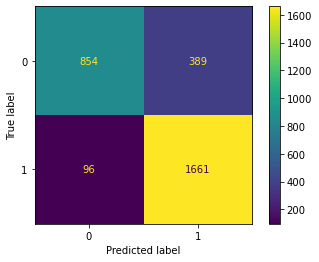

In [52]:
# CodeGrade step3.4
# Replace None with appropriate code

cfm = confusion_matrix(y_sent_test, y_sent_pred)

ConfusionMatrixDisplay(cfm).plot()

### 3.7) Short Answer: Looking at the confusion matrix above, comment on how well the model is generalizing to the testing data.

# Your answer here # brian-added

The model seem to work failrly well: it correctly predicts a high number of True Postives (i.e. 1661) and maintains a low number of False Negatives (i.e. 96) implying good senstivity. The number of False Positives, FP = 389, is considerable suggesting that the model may over-predict the postive class thus affecting precision.

## Part 4: Clustering [Suggested time: 20 minutes]

### 4.1) Short Answer: In the context of clustering, what is a centroid?

# Your answer here # brian-answer

A centroid in clustering is the center point of a cluster which represnts the mean position of all data points within that cluster. They are used to define and update the cluster set in algorithms like K-Means.

### 4.2) Short Answer: KMeans is an algorithm used for clustering data that first randomly intializes $K$ centroids and then use a two-step iterative process (coordinate descent) to minimize the inertia cost function until convergence has been achieved. What two steps are executed during each K-Means iteration?

# Your answer here # brian-answer

The first step is the assignment-step which assigns each data point to the closest centroid frequently based on the euclidean distance. The next step is the update-step which then 'recalculates' the centroids as the mean of all points assigned to each individual cluster.

The following data contains age and income information from a sample of customers that frequent a new mall. The mall has also creating a spending score index based on how often and how much a given customer spends at the mall. They would like to understand whether there is any structure/grouping to the customers they have. In the following, you will use KMeans to cluster the mall's customer base and identify the number of distinct groups present.

In [53]:
# Run this cell without changes to import data
data_df = pd.read_csv('mall_clust.csv').set_index('CustomerID')
data_df.head()

,Age,Annual_Income($),Spending_Score
CustomerID,,,
1,19,15000,39
2,21,15000,81
3,20,16000,6
4,23,16000,77
5,31,17000,40


In [54]:
# Run this cell without changes
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               200 non-null    int64
 1   Annual_Income($)  200 non-null    int64
 2   Spending_Score    200 non-null    int64
dtypes: int64(3)
memory usage: 6.2 KB


In [55]:
# Run this cell without changes
data_df.describe()

,Age,Annual_Income($),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60560.000000,50.200000
std,13.969007,26264.721165,25.823522
min,18.000000,15000.000000,1.000000
25%,28.750000,41500.000000,34.750000
50%,36.000000,61500.000000,50.000000
75%,49.000000,78000.000000,73.000000
max,70.000000,137000.000000,99.000000


### 4.3) Fit a `StandardScaler` to the data and then fit a KMeans clustering model, for K = 3, to the scaled data. Use a `random_state` of 42 for KMeans.

In [56]:
# CodeGrade step4.1
# Replace None with appropriate code and write additional code required to fit the data

# Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_df)

# Kmeans
km = KMeans(n_clusters = 3,
    random_state = 42
)

# Fit kmeans
km.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

### 4.4) Evaluate cluster assignments for these datapoints. Create a new dataframe `data_scaled_df` that includes your scaled data and a new column called "cluster_label" that indicates the cluster assignments.

HINT: You can use `data_df.columns()` to set the appropriate column names for your scaled data!

HINT: Start by putting your scaled data into a `pandas` DataFrame!

In [57]:
# CodeGrade step4.2
# Replace None with appropriate code

# Dataframe for scaled
data_scaled_df = pd.DataFrame(data_scaled, 
        columns = data_df.columns, 
        index = data_df.index
)

# New column
data_scaled_df["cluster_label"] = km.labels_

### 4.5) Below we have provided code to loop through a few values of $k$ from $k=3$ to $k=9$. We fit KMeans data for each value of $k$ and generate cluster labels. Your job is to compute the Silhouette Score for each value of $k$ and add it to the the `km_dict` dictionary. Use $k$ as your dictionary key and the corresponding score as your value.

In [58]:
# CodeGrade step4.3
# Replace None with appropriate code

# Create empty dictionary to populate
km_dict = {}

# Loop through k values
for k in range(3,10):
    km = KMeans(n_clusters = k, random_state = 42)
    clust_pred = km.fit_predict(data_scaled)
    # For each value k get a silhouette score
    ss_metr = silhouette_score(data_scaled, clust_pred) 
    # For each value of k assign a key:value pair to km_dict
    km_dict[k] = ss_metr

Here the dictionary you created will be converted to a pandas Series `km_series`. We'll use pandas plotting to save the Silhouette Score vs $k$ to an ax object and display the plot. 

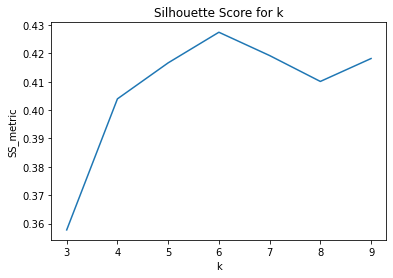

In [59]:
# Run this cell without changes

fig, ax = plt.subplots()


km_series = pd.Series(km_dict)
ax = km_series.plot()
ax.set_title('Silhouette Score for k')
ax.set_xlabel('k')
ax.set_ylabel('SS_metric')

plt.show()

### 4.6) Short Answer: Based on the above plot, how many customer clusters does the SS metric suggest our data is most likely explained by?

# Your answer here: # brian-answer

Based on the plot, the SS metric suggests that our data is most likely explained by 6 customer clusters, as the silhouette score peaks at k = 6, indicating the best-defined grouping.